# Disciplina: Redes Neurais

## Professor: Elcio Hideiti Shiguemori, e-mail: elciohs@gmail.com

## Data: 20/08/2019

# Primeiro exercício

In [1]:
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
import time
import subprocess
from bibneural import normalizar, formatar, treinar, treina_melhor, normalizar_ativa, formatar_ativa, ativa, apresenta


# Primeiro passo: selecionar o diretório e planilha com dados de treinamento

In [4]:
excel_f = r'csv/treina.xls'
df = pd.read_excel(excel_f)
df = df.head(2000)

# Planilha com os dados do treinamento

In [5]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,4,0,1,3,18.86,22.725,59,19.9995,398
1,1,0,1,1,8.20,11.365,40,7.0015,178
2,1,0,1,1,4.10,9.090,54,0.0000,17
3,3,0,0,1,30.34,34.850,70,19.9995,73
4,1,0,0,3,9.84,11.365,87,15.0013,4
5,1,0,1,2,14.76,18.940,87,0.0000,75
6,1,0,0,1,16.40,20.455,37,19.9995,93
7,4,0,0,1,12.30,14.395,49,19.0012,219
8,1,0,0,1,9.84,11.365,65,12.9980,18
9,4,0,1,2,18.04,21.970,75,15.0013,164


# Segundo Passo: inserir o diretório e planilha com exemplos de validação

In [6]:
excel_v = r'csv/valida.xls'
val = pd.read_excel(excel_v)
val


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,3,21.32,25.000,72,19.9995,2
1,3,0,1,1,31.98,34.850,46,8.9981,353
2,4,0,1,1,12.30,15.910,56,6.0032,165
3,4,0,1,2,18.86,22.725,88,6.0032,175
4,1,0,1,1,21.32,25.000,55,8.9981,202
5,3,0,1,1,31.98,37.120,62,31.0009,270
6,1,0,1,1,28.70,31.820,32,0.0000,749
7,2,0,0,1,24.60,31.060,49,0.0000,358
8,1,0,0,1,18.04,21.970,44,15.0013,140
9,2,0,0,2,22.14,25.760,68,12.9980,9


In [7]:
dados_normaliza=df.append(val)

### normalização automática

In [8]:
(minimo, maximo, df,val) = normalizar(dados_normaliza,df,val)

### formatação dos dados automática


In [9]:
(ent, ent_val, sai, sai_val) = formatar(df, val)

# Terceiro Passo: definir parâmetros da Rede Neural Artificial

Entre com quantidade de neurônios (Por exemplo, 2): 10
Entre com a taxa de aprendizado (Por exemplo, 0.1): 0.1
Entre com o erro desejado (Por exemplo, 0.01): 0.01
Entre com numero máximo de epocas (Por exemplo, 10000): 3000


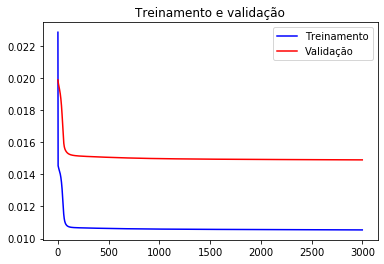


 Erro Quadrático =   0.014902 

 
 
 Deseja treinar mais configuração (s/n)? s
Entre com quantidade de neurônios (Por exemplo, 2): 30
Entre com a taxa de aprendizado (Por exemplo, 0.1): 0.1
Entre com o erro desejado (Por exemplo, 0.01): 0.01
Entre com numero máximo de epocas (Por exemplo, 10000): 3000


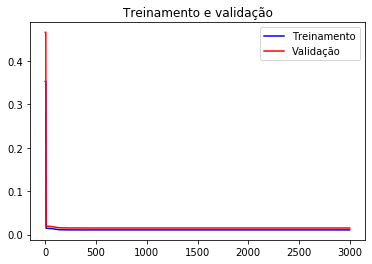


 Erro Quadrático =   0.015103 

 
 
 Deseja treinar mais configuração (s/n)? s
Entre com quantidade de neurônios (Por exemplo, 2): 10
Entre com a taxa de aprendizado (Por exemplo, 0.1): 0.05
Entre com o erro desejado (Por exemplo, 0.01): 0.01
Entre com numero máximo de epocas (Por exemplo, 10000): 3000


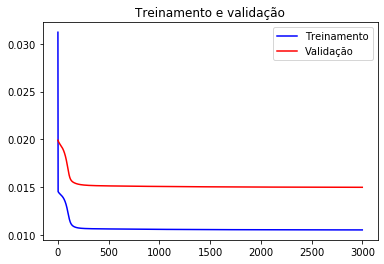


 Erro Quadrático =   0.01499 

 
 
 Deseja treinar mais configuração (s/n)? s
Entre com quantidade de neurônios (Por exemplo, 2): 10
Entre com a taxa de aprendizado (Por exemplo, 0.1): 0.1
Entre com o erro desejado (Por exemplo, 0.01): 0.005
Entre com numero máximo de epocas (Por exemplo, 10000): 3000


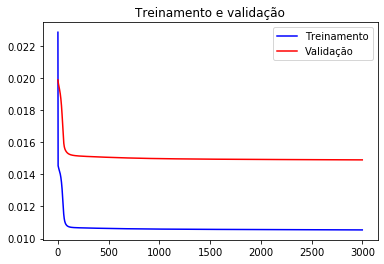


 Erro Quadrático =   0.014902 

 
 
 Deseja treinar mais configuração (s/n)? s
Entre com quantidade de neurônios (Por exemplo, 2): 10
Entre com a taxa de aprendizado (Por exemplo, 0.1): 0.1
Entre com o erro desejado (Por exemplo, 0.01): 0.01
Entre com numero máximo de epocas (Por exemplo, 10000): 10000


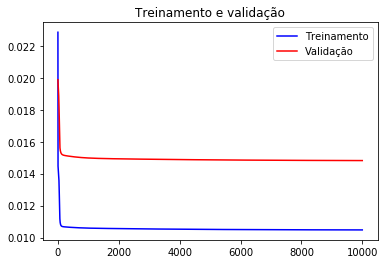


 Erro Quadrático =   0.014819 


In [ ]:
(neuro)=treinar(ent, ent_val, sai, sai_val)

# Quarto Passo: Treinar a rede neural com a melhor configuração

In [ ]:
(neuro)=treina_melhor(ent, ent_val, sai, sai_val)

# Quarto passo: Avaliação

## Carrega planilha Excel contendo os dados a serem avaliados

In [ ]:
excel_f1 = r'csv/testa.xls'

avalia = pd.read_excel(excel_f1)

avalia

In [ ]:
en_aval = avalia.columns[range(0, avalia.shape[1],1)]
saida_real=pd.DataFrame(avalia,columns=[en_aval[avalia.shape[1]-1]])
avalia=normalizar_ativa (avalia,minimo,maximo)
(ent_avalia, sai_avalia)=formatar_ativa(avalia)

In [ ]:
y2=ativa (avalia, ent_avalia, sai_avalia, neuro,minimo, maximo)


In [ ]:
en1 = avalia.columns[avalia.shape[1]-1]
saida_avalia=pd.DataFrame(avalia,columns=[en1])

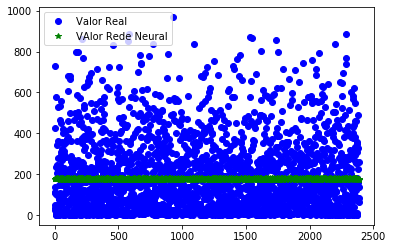


 Valor ofertado = 
  425
 137
 731
  35
  49
 113
 109
  27
 101
   5
   2
  19
   1
   4
 580
 233
  49
  37
  98
  11
 245
 206
 343
  33
   4
 527
 192
 278
 363
 222
   8
  21
   3
   1
 147
   6
  77
  79
  99
 244
 109
  91
 224
 214
  21
 536
 466
 281
 558
 296
 453
 310
 159
  49
 194
  11
 324
 148
  67
 200
 269
 152
 358
 420
 353
 298
   3
 404
 147
 291
 308
 347
 232
 301
  81
   4
 206
 106
 312
   7
   2
  31
 212
 210
  19
 357
 359
 152
  30
 135
 283
 110
 410
  65
  71
 369
 373
  20
 162
   5
 372
 133
 607
   7
 181
 217
 182
 459
 679
 381
 190
 124
 185
  51
  52
 166
   1
 227
 207
 420
 668
  12
   1
 118
 499
 679
  84
 160
 266
  11
 364
 264
 291
   3
   4
 215
  65
   9
 106
 258
 251
  20
  87
  16
 135
  23
 225
 194
 260
  90
  11
 101
   3
 112
 272
 138
 463
  34
  68
 104
   5
  14
  52
  68
 499
   1
 800
 106
 157
   5
  56
 179
  86
 361
 586
  30
 241
  81
 487
 191
 154
   9
 800
 268
 165
  16
 151
 503
   5
 130
  23
 447
  82
  16
 196
  30

In [16]:
apresenta (y2,saida_real)